In [1]:
!pip install pymongo

     |████████████████████████████████| 506 kB 13.9 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [10]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [11]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install tweepy

     |████████████████████████████████| 64 kB 3.9 MB/s  eta 0:00:01
     |████████████████████████████████| 146 kB 67.9 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install twitter

     |████████████████████████████████| 50 kB 1.6 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

In [5]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection'] 

In [6]:
client = MongoClient(mongod_connect)
db = client.lab9 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

In [7]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

In [8]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

In [12]:
search_results = rest_api.search.tweets( count=count,q=q,) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Thu Nov 04 19:26:44 +0000 2021'
'Thu Nov 04 19:26:44 +0000 2021'
'Thu Nov 04 19:26:41 +0000 2021'
'Thu Nov 04 19:26:40 +0000 2021'
'Thu Nov 04 19:26:40 +0000 2021'
'Thu Nov 04 19:26:38 +0000 2021'
'Thu Nov 04 19:26:38 +0000 2021'
'Thu Nov 04 19:26:37 +0000 2021'
'Thu Nov 04 19:26:37 +0000 2021'
'Thu Nov 04 19:26:36 +0000 2021'
'Thu Nov 04 19:26:35 +0000 2021'
'Thu Nov 04 19:26:35 +0000 2021'
'Thu Nov 04 19:26:35 +0000 2021'
'Thu Nov 04 19:26:35 +0000 2021'
'Thu Nov 04 19:26:34 +0000 2021'
'Thu Nov 04 19:26:34 +0000 2021'
'Thu Nov 04 19:26:33 +0000 2021'
'Thu Nov 04 19:26:32 +0000 2021'
'Thu Nov 04 19:26:32 +0000 2021'
'Thu Nov 04 19:26:32 +0000 2021'
'Thu Nov 04 19:26:31 +0000 2021'
'Thu Nov 04 19:26:30 +0000 2021'
'Thu Nov 04 19:26:29 +0000 2021'
'Thu Nov 04 19:26:29 +0000 2021'
'Thu Nov 04 19:26:28 +0000 2021'
'Thu Nov 04 19:26:28 +0000 2021'
'Thu Nov 04 19:26:27 +0000 2021'
'Thu Nov 04 19:26:27 +0000 2021'
'Thu Nov 04 19:26:27 +0000 2021'
'Thu Nov 04 19:26:27 +0000 2021'
'Thu Nov 0

In [13]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                         max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Thu Nov 04 19:25:47 +0000 2021'
'Thu Nov 04 19:25:47 +0000 2021'
'Thu Nov 04 19:25:47 +0000 2021'
'Thu Nov 04 19:25:46 +0000 2021'
'Thu Nov 04 19:25:46 +0000 2021'
'Thu Nov 04 19:25:45 +0000 2021'
'Thu Nov 04 19:25:44 +0000 2021'
'Thu Nov 04 19:25:43 +0000 2021'
'Thu Nov 04 19:25:42 +0000 2021'
'Thu Nov 04 19:25:41 +0000 2021'
'Thu Nov 04 19:25:41 +0000 2021'
'Thu Nov 04 19:25:41 +0000 2021'
'Thu Nov 04 19:25:41 +0000 2021'
'Thu Nov 04 19:25:40 +0000 2021'
'Thu Nov 04 19:25:39 +0000 2021'
'Thu Nov 04 19:25:39 +0000 2021'
'Thu Nov 04 19:25:38 +0000 2021'
'Thu Nov 04 19:25:37 +0000 2021'
'Thu Nov 04 19:25:37 +0000 2021'
'Thu Nov 04 19:25:36 +0000 2021'
'Thu Nov 04 19:25:36 +0000 2021'
'Thu Nov 04 19:25:35 +0000 2021'
'Thu Nov 04 19:25:34 +0000 2021'
'Thu Nov 04 19:25:33 +0000 2021'
'Thu Nov 04 19:25:33 +0000 2021'
'Thu Nov 04 19:25:33 +0000 2021'
'Thu Nov 04 19:25:32 +0000 2021'
'Thu Nov 04 19:25:32 +0000 2021'
'Thu Nov 04 19:25:31 +0000 2021'
'Thu Nov 04 19:25:30 +0000 2021'
'Thu Nov 0

'Thu Nov 04 19:23:32 +0000 2021'
'Thu Nov 04 19:23:31 +0000 2021'
'Thu Nov 04 19:23:30 +0000 2021'
'Thu Nov 04 19:23:30 +0000 2021'
'Thu Nov 04 19:23:30 +0000 2021'
'Thu Nov 04 19:23:29 +0000 2021'
'Thu Nov 04 19:23:29 +0000 2021'
'Thu Nov 04 19:23:29 +0000 2021'
'Thu Nov 04 19:23:29 +0000 2021'
'Thu Nov 04 19:23:28 +0000 2021'
'Thu Nov 04 19:23:27 +0000 2021'
'Thu Nov 04 19:23:27 +0000 2021'
'Thu Nov 04 19:23:27 +0000 2021'
'Thu Nov 04 19:23:27 +0000 2021'
'Thu Nov 04 19:23:27 +0000 2021'
'Thu Nov 04 19:23:27 +0000 2021'
'Thu Nov 04 19:23:26 +0000 2021'
'Thu Nov 04 19:23:26 +0000 2021'
'Thu Nov 04 19:23:26 +0000 2021'
'Thu Nov 04 19:23:25 +0000 2021'
'Thu Nov 04 19:23:25 +0000 2021'
'Thu Nov 04 19:23:24 +0000 2021'
'Thu Nov 04 19:23:24 +0000 2021'
'Thu Nov 04 19:23:23 +0000 2021'
'Thu Nov 04 19:23:23 +0000 2021'
'Thu Nov 04 19:23:22 +0000 2021'
'Thu Nov 04 19:23:21 +0000 2021'
'Thu Nov 04 19:23:21 +0000 2021'
'Thu Nov 04 19:23:21 +0000 2021'
'Thu Nov 04 19:23:20 +0000 2021'
'Thu Nov 0

'Thu Nov 04 19:21:16 +0000 2021'
'Thu Nov 04 19:21:16 +0000 2021'
'Thu Nov 04 19:21:15 +0000 2021'
'Thu Nov 04 19:21:15 +0000 2021'
'Thu Nov 04 19:21:15 +0000 2021'
'Thu Nov 04 19:21:15 +0000 2021'
'Thu Nov 04 19:21:15 +0000 2021'
'Thu Nov 04 19:21:13 +0000 2021'
'Thu Nov 04 19:21:13 +0000 2021'
'Thu Nov 04 19:21:12 +0000 2021'
'Thu Nov 04 19:21:12 +0000 2021'
'Thu Nov 04 19:21:12 +0000 2021'
'Thu Nov 04 19:21:12 +0000 2021'
'Thu Nov 04 19:21:10 +0000 2021'
'Thu Nov 04 19:21:10 +0000 2021'
'Thu Nov 04 19:21:10 +0000 2021'
'Thu Nov 04 19:21:09 +0000 2021'
'Thu Nov 04 19:21:09 +0000 2021'
'Thu Nov 04 19:21:09 +0000 2021'
'Thu Nov 04 19:21:08 +0000 2021'
'Thu Nov 04 19:21:07 +0000 2021'
'Thu Nov 04 19:21:07 +0000 2021'
'Thu Nov 04 19:21:07 +0000 2021'
'Thu Nov 04 19:21:06 +0000 2021'
'Thu Nov 04 19:21:06 +0000 2021'
'Thu Nov 04 19:21:06 +0000 2021'
'Thu Nov 04 19:21:05 +0000 2021'
'Thu Nov 04 19:21:05 +0000 2021'
'Thu Nov 04 19:21:04 +0000 2021'
'Thu Nov 04 19:21:04 +0000 2021'
'Thu Nov 0

'Thu Nov 04 19:19:01 +0000 2021'
'Thu Nov 04 19:19:00 +0000 2021'
'Thu Nov 04 19:19:00 +0000 2021'
'Thu Nov 04 19:18:59 +0000 2021'
'Thu Nov 04 19:18:58 +0000 2021'
'Thu Nov 04 19:18:58 +0000 2021'
'Thu Nov 04 19:18:58 +0000 2021'
'Thu Nov 04 19:18:57 +0000 2021'
'Thu Nov 04 19:18:56 +0000 2021'
'Thu Nov 04 19:18:55 +0000 2021'
'Thu Nov 04 19:18:55 +0000 2021'
'Thu Nov 04 19:18:55 +0000 2021'
'Thu Nov 04 19:18:54 +0000 2021'
'Thu Nov 04 19:18:54 +0000 2021'
'Thu Nov 04 19:18:54 +0000 2021'
'Thu Nov 04 19:18:53 +0000 2021'
'Thu Nov 04 19:18:53 +0000 2021'
'Thu Nov 04 19:18:53 +0000 2021'
'Thu Nov 04 19:18:52 +0000 2021'
'Thu Nov 04 19:18:52 +0000 2021'
'Thu Nov 04 19:18:51 +0000 2021'
'Thu Nov 04 19:18:50 +0000 2021'
'Thu Nov 04 19:18:50 +0000 2021'
'Thu Nov 04 19:18:50 +0000 2021'
'Thu Nov 04 19:18:49 +0000 2021'
'Thu Nov 04 19:18:49 +0000 2021'
'Thu Nov 04 19:18:49 +0000 2021'
'Thu Nov 04 19:18:48 +0000 2021'
'Thu Nov 04 19:18:48 +0000 2021'
'Thu Nov 04 19:18:47 +0000 2021'
'Thu Nov 0

'Thu Nov 04 19:16:47 +0000 2021'
'Thu Nov 04 19:16:47 +0000 2021'
'Thu Nov 04 19:16:46 +0000 2021'
'Thu Nov 04 19:16:46 +0000 2021'
'Thu Nov 04 19:16:44 +0000 2021'
'Thu Nov 04 19:16:43 +0000 2021'
'Thu Nov 04 19:16:43 +0000 2021'
'Thu Nov 04 19:16:42 +0000 2021'
'Thu Nov 04 19:16:42 +0000 2021'
'Thu Nov 04 19:16:42 +0000 2021'
'Thu Nov 04 19:16:42 +0000 2021'
'Thu Nov 04 19:16:41 +0000 2021'
'Thu Nov 04 19:16:41 +0000 2021'
'Thu Nov 04 19:16:41 +0000 2021'
'Thu Nov 04 19:16:38 +0000 2021'
'Thu Nov 04 19:16:37 +0000 2021'
'Thu Nov 04 19:16:37 +0000 2021'
'Thu Nov 04 19:16:36 +0000 2021'
'Thu Nov 04 19:16:36 +0000 2021'
'Thu Nov 04 19:16:36 +0000 2021'
'Thu Nov 04 19:16:36 +0000 2021'
'Thu Nov 04 19:16:35 +0000 2021'
'Thu Nov 04 19:16:34 +0000 2021'
'Thu Nov 04 19:16:33 +0000 2021'
'Thu Nov 04 19:16:33 +0000 2021'
'Thu Nov 04 19:16:32 +0000 2021'
'Thu Nov 04 19:16:31 +0000 2021'
'Thu Nov 04 19:16:30 +0000 2021'
'Thu Nov 04 19:16:30 +0000 2021'
'Thu Nov 04 19:16:29 +0000 2021'
'Thu Nov 0

'Thu Nov 04 19:14:51 +0000 2021'
'Thu Nov 04 19:14:51 +0000 2021'
'Thu Nov 04 19:14:51 +0000 2021'
'Thu Nov 04 19:14:50 +0000 2021'
'Thu Nov 04 19:14:49 +0000 2021'
'Thu Nov 04 19:14:49 +0000 2021'
'Thu Nov 04 19:14:49 +0000 2021'
'Thu Nov 04 19:14:48 +0000 2021'
'Thu Nov 04 19:14:47 +0000 2021'
'Thu Nov 04 19:14:47 +0000 2021'
'Thu Nov 04 19:14:46 +0000 2021'
'Thu Nov 04 19:14:46 +0000 2021'
'Thu Nov 04 19:14:46 +0000 2021'
'Thu Nov 04 19:14:45 +0000 2021'
'Thu Nov 04 19:14:45 +0000 2021'
'Thu Nov 04 19:14:44 +0000 2021'
'Thu Nov 04 19:14:44 +0000 2021'
'Thu Nov 04 19:14:43 +0000 2021'
'Thu Nov 04 19:14:43 +0000 2021'
'Thu Nov 04 19:14:43 +0000 2021'
'Thu Nov 04 19:14:43 +0000 2021'
'Thu Nov 04 19:14:42 +0000 2021'
'Thu Nov 04 19:14:42 +0000 2021'
'Thu Nov 04 19:14:41 +0000 2021'
'Thu Nov 04 19:14:40 +0000 2021'
'Thu Nov 04 19:14:40 +0000 2021'
'Thu Nov 04 19:14:39 +0000 2021'
'Thu Nov 04 19:14:38 +0000 2021'
'Thu Nov 04 19:14:36 +0000 2021'
'Thu Nov 04 19:14:34 +0000 2021'
'Thu Nov 0

'Thu Nov 04 19:12:55 +0000 2021'
'Thu Nov 04 19:12:54 +0000 2021'
'Thu Nov 04 19:12:54 +0000 2021'
'Thu Nov 04 19:12:53 +0000 2021'
'Thu Nov 04 19:12:53 +0000 2021'
'Thu Nov 04 19:12:52 +0000 2021'
'Thu Nov 04 19:12:52 +0000 2021'
'Thu Nov 04 19:12:51 +0000 2021'
'Thu Nov 04 19:12:50 +0000 2021'
'Thu Nov 04 19:12:50 +0000 2021'
'Thu Nov 04 19:12:49 +0000 2021'
'Thu Nov 04 19:12:48 +0000 2021'
'Thu Nov 04 19:12:48 +0000 2021'
'Thu Nov 04 19:12:47 +0000 2021'
'Thu Nov 04 19:12:46 +0000 2021'
'Thu Nov 04 19:12:46 +0000 2021'
'Thu Nov 04 19:12:45 +0000 2021'
'Thu Nov 04 19:12:45 +0000 2021'
'Thu Nov 04 19:12:44 +0000 2021'
'Thu Nov 04 19:12:43 +0000 2021'
'Thu Nov 04 19:12:43 +0000 2021'
'Thu Nov 04 19:12:43 +0000 2021'
'Thu Nov 04 19:12:42 +0000 2021'
'Thu Nov 04 19:12:42 +0000 2021'
'Thu Nov 04 19:12:42 +0000 2021'
'Thu Nov 04 19:12:42 +0000 2021'
'Thu Nov 04 19:12:41 +0000 2021'
'Thu Nov 04 19:12:41 +0000 2021'
'Thu Nov 04 19:12:39 +0000 2021'
'Thu Nov 04 19:12:39 +0000 2021'
'Thu Nov 0

KeyboardInterrupt: 

In [14]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users

2576
2251


In [15]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index

'text_index'

In [18]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vaccine"}}) # return tweets contain vote

In [19]:
for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Skeptic
text: @_evelynrae Covid Vaccines are safe. Billions have been vaccinated world over. Getting vaccinated is important to eradicate #COVID19
----
name: sally stevenson
text: RT @BernieSpofforth: BELGIUM - Says NO! To mandatory vaccines and vaccine passports!

They know a vaccine passport won’t set them free. So…
----
name: MARCUS
text: RT @BernieSpofforth: BELGIUM - Says NO! To mandatory vaccines and vaccine passports!

They know a vaccine passport won’t set them free. So…
----
name: Ian Burrowes
text: @soledadobrien Question: "Are you vaccinated and what's your stance on vaccination"?
Yes, I have been immunized. An… https://t.co/0gE3VxQyCI
----
name: Victoria Tupou
text: RT @KlynchStuff: Raw vaccine data can be very (very) misleading. The fact that more vaccinated people die/are hospitalised in a highly vacc…
----
name: Steven Walton
text: RT @KlynchStuff: Raw vaccine data can be very (very) misleading. The fact that more vaccinated people die/are hospitalised in a hi

In [20]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vaccine"}}) # return tweets contain vote

In [21]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,lang,retweeted_status,possibly_sensitive,quoted_status_id,quoted_status_id_str,extended_entities,quoted_status
0,61843100f1bb773f08498656,Thu Nov 04 19:00:34 +0000 2021,1456335582620160007,1456335582620160007,@_evelynrae Covid Vaccines are safe. Billions ...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.455821e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,6184340cf1bb773f08498bb3,Thu Nov 04 19:21:09 +0000 2021,1456340758714257416,1456340758714257416,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,{'created_at': 'Wed Nov 03 18:30:11 +0000 2021...,NaN,NaN,NaN,NaN,NaN
2,61843106f1bb773f08498778,Thu Nov 04 18:58:46 +0000 2021,1456335125734731778,1456335125734731778,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,{'created_at': 'Wed Nov 03 18:30:11 +0000 2021...,NaN,NaN,NaN,NaN,NaN
3,6184310df1bb773f084988c8,Thu Nov 04 18:55:47 +0000 2021,1456334378292989964,1456334378292989964,"@soledadobrien Question: ""Are you vaccinated a...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.456061e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
4,61843420f1bb773f08498f90,Thu Nov 04 19:13:00 +0000 2021,1456338709805101067,1456338709805101067,RT @KlynchStuff: Raw vaccine data can be very ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,{'created_at': 'Thu Nov 04 18:43:57 +0000 2021...,NaN,NaN,NaN,NaN,NaN
5,61843419f1bb773f08498e3d,Thu Nov 04 19:15:22 +0000 2021,1456339303336865794,1456339303336865794,RT @KlynchStuff: Raw vaccine data can be very ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,{'created_at': 'Thu Nov 04 18:43:57 +0000 2021...,NaN,NaN,NaN,NaN,NaN
6,61843419f1bb773f08498e36,Thu Nov 04 19:15:24 +0000 2021,1456339315278159876,1456339315278159876,RT @CDCgov: Parents and Caregivers: CDC recomm...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,{'created_at': 'Wed Nov 03 19:25:19 +0000 2021...,NaN,NaN,NaN,NaN,NaN
7,61843418f1bb773f08498e2d,Thu Nov 04 19:15:27 +0000 2021,1456339326611058690,1456339326611058690,RT @KlynchStuff: Raw vaccine data can be very ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,{'created_at': 'Thu Nov 04 18:43:57 +0000 2021...,NaN,NaN,NaN,NaN,NaN
8,61843418f1bb773f08498df8,Thu Nov 04 19:15:58 +0000 2021,1456339455539703810,1456339455539703810,RT @KlynchStuff: Raw vaccine data can be very ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,{'created_at': 'Thu Nov 04 18:43:57 +0000 2021...,NaN,NaN,NaN,NaN,NaN
9,61843410f1bb773f08498c6f,Thu Nov 04 19:19:31 +0000 2021,1456340351136923655,1456340351136923655,RT @AZCountryPatri1: Double vaccinated person ...,False,"{'hashtags': [

<AxesSubplot:>

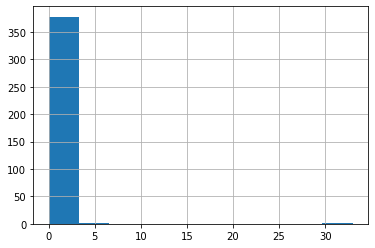

In [22]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count